
**Task 3:Number Recognition**



In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
#Handwritten digit recognition using MNIST dataset is a major project 
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

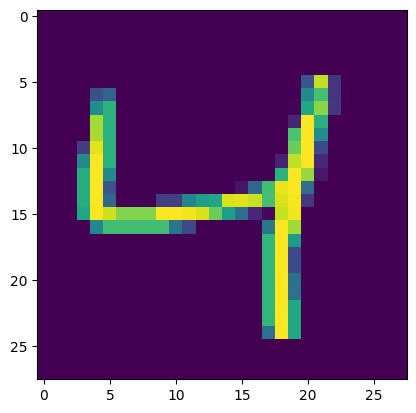

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

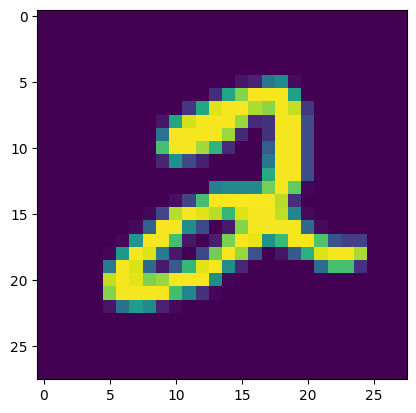

In [6]:
plt.imshow(X_train[5])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9763 - accuracy: 0.7193 - val_loss: 0.5268 - val_accuracy: 0.8489
Epoch 2/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4834 - accuracy: 0.8616 - val_loss: 0.4024 - val_accuracy: 0.8832
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3984 - accuracy: 0.8851 - val_loss: 0.3551 - val_accuracy: 0.8950
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3582 - accuracy: 0.8967 - val_loss: 0.3215 - val_accuracy: 0.9055
Epoch 5/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3266 - accuracy: 0.9050 - val_loss: 0.2943 - val_accuracy: 0.9126
Epoch 6/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2998 - accuracy: 0.9131 - val_loss: 0.2736 - val_accuracy: 0.9210
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2754 - accuracy: 0.9210 - val_loss: 0.2509 - val_accuracy:

In [14]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 936us/step


In [15]:
y_pred = y_prob.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9627

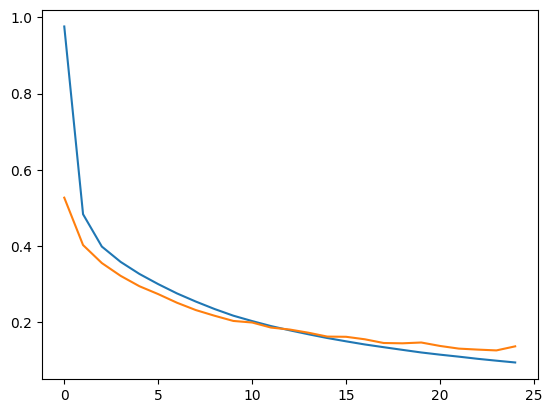

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

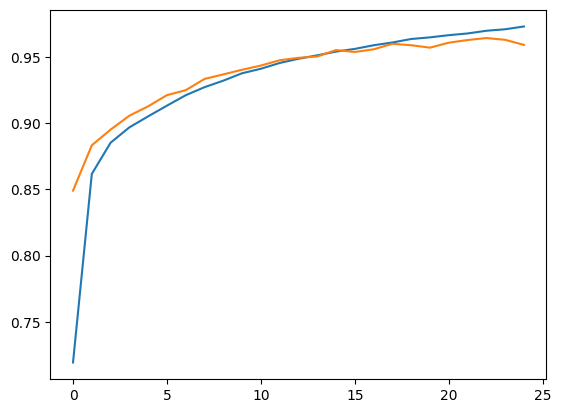

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

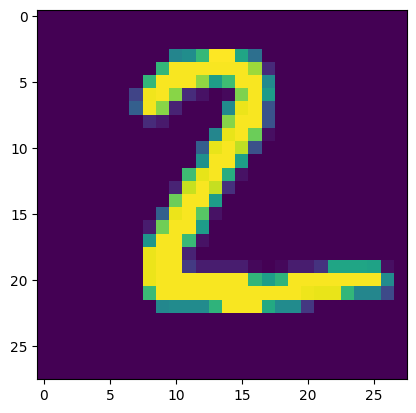

In [19]:
plt.imshow(X_test[1])

In [20]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 15ms/step


array([2])